## Import Required Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from tensorflow import keras
from tensorflow.keras import layers

## Load Image Data into Arrays

In [35]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

### Set Image sizes

In [36]:
img_width = 180
img_height =180 

### Load Training Data as Arrays

In [37]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


### Check the different fruits and vegetables we have

In [38]:
data_cat = data_train.class_names

### Load Validation Data as Arrays

In [39]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 351 files belonging to 36 classes.


### Load Testing Data as Arrays

In [40]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 359 files belonging to 36 classes.


### Print 9 images with their labels

2024-08-04 09:25:58.769499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-04 09:25:58.770161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-04 09:26:00.701442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-04 09:26:03.078108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


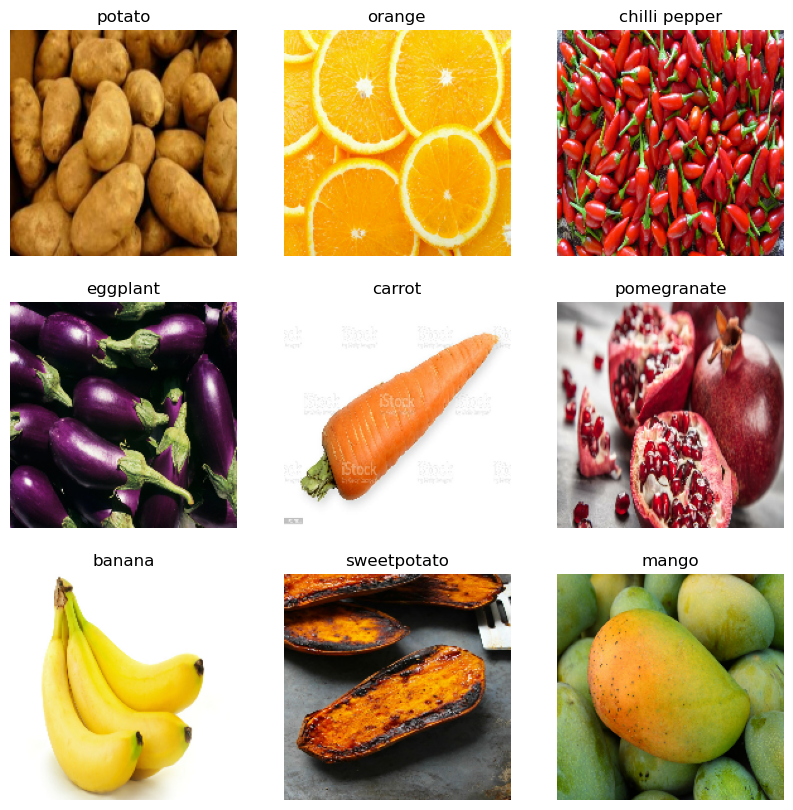

In [41]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL.Image')



plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

### Build the Sequential Model

In [42]:
from keras.models import Sequential

In [43]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))     
])

### Compile the model

In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

### Check the accuracy of the model

Text(0.5, 1.0, 'Loss')

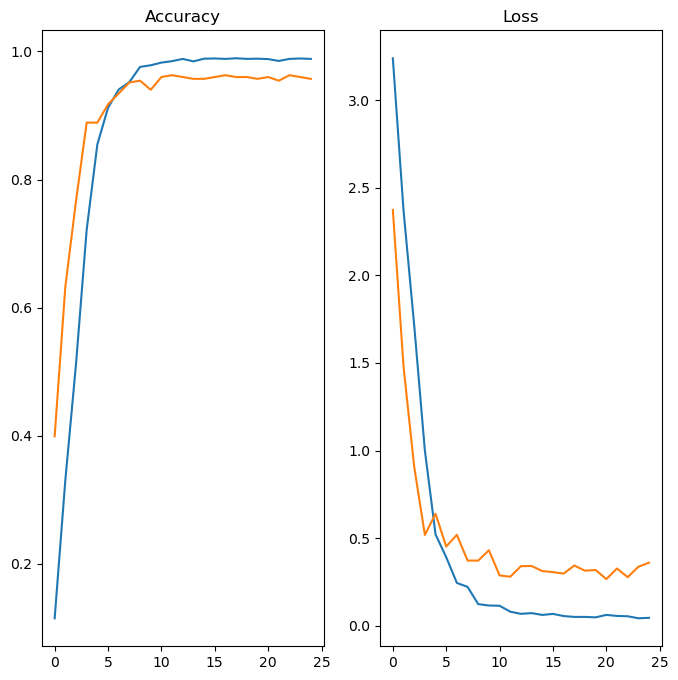

In [46]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

## Testing the model with an image

### Select and convert image to array

In [49]:
image = 'temp/Image_7.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

### Make prediction

In [50]:
predict = model.predict(img_bat)

1/1 [==============================] - 1s 810ms/step


Find the score

In [51]:
score = tf.nn.softmax(predict)

### Print the outcome of prediction

In [52]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is chilli pepper with accuracy of 99.82


## Save the model

In [53]:
model.save('Image_classify.keras')